In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

from numpy import exp
from scipy.optimize import minimize

# Theoretical

In [4]:
tau = 10          # Lifetime in ms
N = 10000         # Number of events (atoms)

data = np.random.exponential(tau, N)
# Add noise to signal. Std of 4
# data = data + np.random.normal(0, 100, N)

In [5]:
M = 50            # Total number of detection channels
T = 0.25*tau      # Channel time length

# detection time
detecT = M * T

print('Detection time = %.2f lifetimes' % ((M*T)/tau))

Detection time = 12.50 lifetimes


<IPython.core.display.Javascript object>


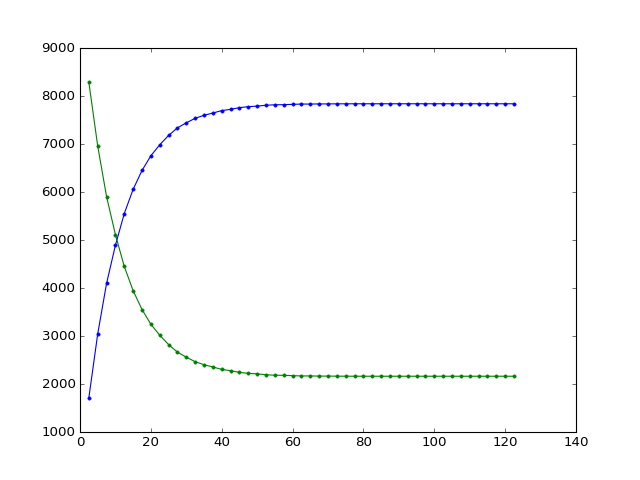

In [6]:
bins = np.linspace(T,T*M, M)
# evaluate the histogram
values, base = np.histogram(data, bins=bins)
#evaluate the cumulative
cumulative = np.cumsum(values)
# plot the cumulative function
plt.plot(base[:-1], cumulative, '.-', c='blue')
# plot the survival function
plt.plot(base[:-1], N-cumulative, '.-', c='green')

In [7]:
CRLB = 1/((T/tau)**2 * ((exp(T/tau)/(exp(T/tau)-1)**2) - (M**2*exp(M*T/tau)/(exp(M*T/tau)-1)**2)))
CRLB * tau**2 / N

0.010058079287229221

In [11]:
# Set up your observed y values, sd (10)
yObs = decay = N-cumulative+np.random.normal(0, 100, len(bins)-1)

# Define the likelihood function where params is a list of initial parameter estimates
def model_func(params):
    # Resave the initial parameter guesses
    b0 = params[0]
    b1 = params[1]
    sd = params[2]
      
    # Calculate the predicted values from the initial parameter guesses
    yPred = b0 + b1*x
    
    # Calculate the negative log-likelihood as the negative sum of the log of a normal
    # PDF where the observed values are normally distributed around the mean (yPred)
    # with a standard deviation of sd
    logLik = -np.sum( stats.norm.logpdf(yObs, loc=yPred, scale=sd) )
    
    # Tell the function to return the NLL (this is what will be minimized)
    return a*np.exp(-t/b)+c

# Make a list of initial parameter guesses (b0, b1, sd)    
initParams = [max(decay)-min(decay), 10, min(decay)]

# Run the minimizer
results = minimize(model_func, initParams, method='nelder-mead')

# Print the results. They should be really close to your actual values
print(results.x)

NameError: name 'x' is not defined

In [12]:
# http://stackoverflow.com/questions/7718034/maximum-likelihood-estimate-pseudocode

# import the packages
import numpy as np
from scipy.optimize import minimize
import scipy.stats as stats
import time

# Set up your x values
x = np.linspace(0, 100, num=100)

# Set up your observed y values with a known slope (2.4), intercept (5), and sd (4)
yObs = 5 + 2.4*x + np.random.normal(0, 4, 100)

# Define the likelihood function where params is a list of initial parameter estimates
def regressLL(params):
    # Resave the initial parameter guesses
    b0 = params[0]
    b1 = params[1]
    sd = params[2]

    # Calculate the predicted values from the initial parameter guesses
    yPred = b0 + b1*x

    # Calculate the negative log-likelihood as the negative sum of the log of a normal
    # PDF where the observed values are normally distributed around the mean (yPred)
    # with a standard deviation of sd
    logLik = -np.sum( stats.norm.logpdf(yObs, loc=yPred, scale=sd) )

    # Tell the function to return the NLL (this is what will be minimized)
    return(logLik)

# Make a list of initial parameter guesses (b0, b1, sd)    
initParams = [1, 1, 1]

# Run the minimizer
results = minimize(regressLL, initParams, method='nelder-mead')

# Print the results. They should be really close to your actual values
print(results.x)

[ 4.47860318  2.40421999  3.78212931]


# With Data